# Google Revenue Prediction

## Kaggle Challenge Description

## Data Exploration 

In [6]:
import pandas as pd
import sklearn
import json
import os

csv_file = "data/test_v2.csv"
JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
print(os.path.join(os.getcwd(),csv_file))
df = pd.read_csv(os.path.join(os.getcwd(),csv_file),
                converters={column: json.loads for column in JSON_COLUMNS},
                dtype={'fullVisitorId': 'str'},
                nrows=2000)

for column in JSON_COLUMNS:
    column_as_df = json_normalize(df[column])
    column_as_df.columns = ["%s.%s" % (column, subcolumn) for subcolumn in column_as_df.columns]
    df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
print("Loaded %s. Shape: %s" % (os.path.basename(csv_path),df.shape))

    
df.head()

/Users/hchew/git/school/cs185c/google-revenue-prediction/data/test_v2.csv
True


IOError: Initializing from file failed

## Columns and Types

In [70]:
df.dtypes

channelGrouping         object
customDimensions        object
date                     int64
device                  object
fullVisitorId           object
geoNetwork              object
hits                    object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

# What are we predicting?
We are predicting the **natural log** of the sum of all transactions **per user**.

$$ y_{user} = \sum_{i=1}^n transaction_{user_{i}} $$
$$ target_{user} = ln(y_{user} + 1) $$

In [3]:
import matplotlib
%matplotlib inline

matplotlib.__version__

'3.0.2'

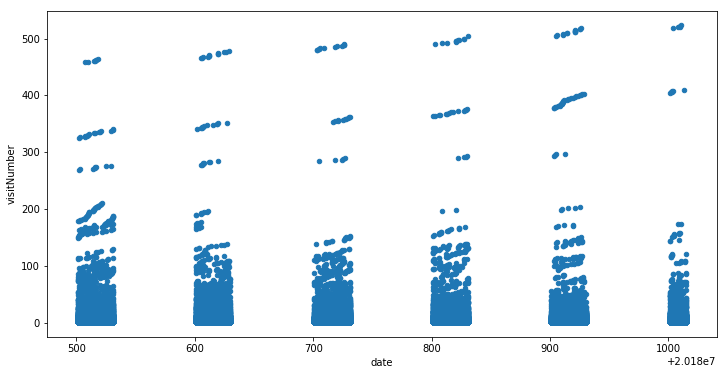

In [5]:
df.plot(kind="scatter", x = 'date', y='visitNumber', figsize=(12,6))